## Support Vector Classifier Implementation

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
##  Lets create synthetic data points
from sklearn.datasets import make_classification


In [92]:
X,y = make_classification(n_samples= 1000, n_features = 2, n_classes = 2, n_clusters_per_class=1, n_redundant = 0)

In [93]:
X

array([[-0.90756256, -0.88407957],
       [ 0.48593064,  0.45660431],
       [-1.74087492, -0.96800769],
       ...,
       [-1.65798215, -0.63287145],
       [-0.75342427, -1.73990177],
       [ 1.89768998, -0.4828065 ]])

In [94]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [95]:
pd.DataFrame(X)[0]

,0
0,-0.907563
1,0.485931
2,-1.740875
3,1.102273
4,1.509748
...,...
995,1.136559
996,0.028945
997,-1.657982
998,-0.753424


<Axes: xlabel='0', ylabel='1'>

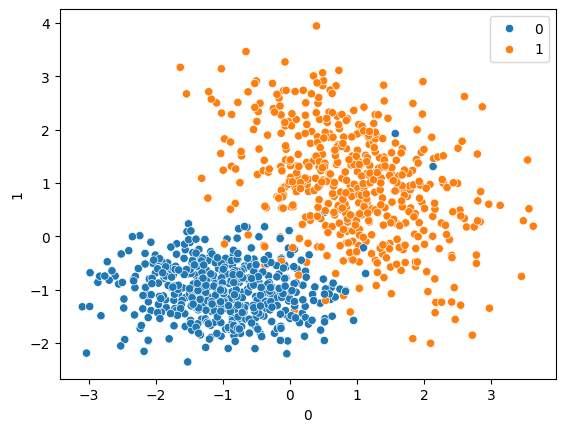

In [96]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

svc = SVC(kernel='linear')  # sincce data points are clearly seperable
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [98]:
## Predictions
y_pred = svc.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       115
           1       0.98      0.95      0.97       135

    accuracy                           0.96       250
   macro avg       0.96      0.97      0.96       250
weighted avg       0.96      0.96      0.96       250



In [101]:
print(confusion_matrix(y_test,y_pred))

[[113   2]
 [  7 128]]


  Lets check with different scenario

In [102]:
X,y = make_classification(n_samples= 1000, n_features = 2, n_classes = 2, n_clusters_per_class=2, n_redundant = 0)

<Axes: xlabel='0', ylabel='1'>

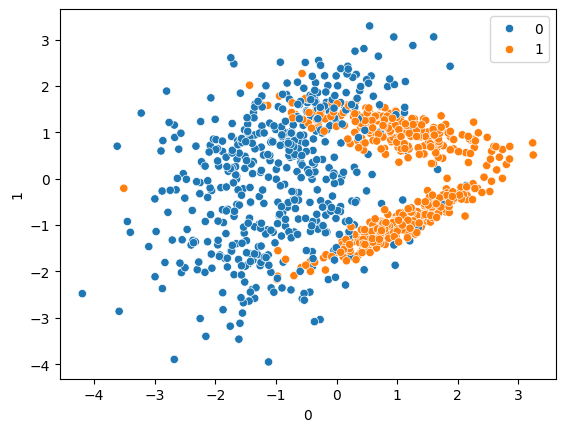

In [103]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

Here the datapoints are overlapping in such case we can use other types of kernels

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [105]:
rbf = SVC(kernel = 'rbf')
rbf.fit(X_train, y_train)

SVC()

In [106]:
y_pred = rbf.predict(X_test)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       116
           1       0.92      0.96      0.94       134

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[105  11]
 [  6 128]]


The accuracy has improved

When tried with Polynomial Kernel

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
poly = SVC(kernel = 'poly')
poly.fit(X_train, y_train)
y_pred2 = poly.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       116
           1       0.89      0.90      0.89       134

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[105  11]
 [  6 128]]


Poly is giving bad accuracy

FOR Sigmoid

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
Sigmoid = SVC(kernel = 'sigmoid')
Sigmoid.fit(X_train, y_train)
y_pred3 = Sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       116
           1       0.86      0.84      0.85       134

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[ 98  18]
 [ 22 112]]


This  giving even more bad accuracy when compared to Polynomial , there when given a dataset where the datapoints are overlapped using rbf would be more efficient

In [111]:
Sigmoid.intercept_  # coef is oly available for linear kernel

array([-1.94088311])

Hyperparameter tuning with SVC

In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'] # here we are using rbf kernel but we can use other kernel too.
}

grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
print(grid.best_params_)



{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [114]:
y_pred_grid = grid.predict(X_test)

print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       116
           1       0.91      0.96      0.94       134

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



We have got a good accuracy